In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#LECTURA DEL DATAFRAME
df = pd.read_csv('/content/df_v3.csv')
df

,URL,Ubicación,Precio ARS,Precio USD,Sup. cubierta [m²],Dormitorios,Baños,Ambientes,Antiguedad [años],Estado
0,https://www.argenprop.com/casa-en-alquiler-en-...,Honorio Pueyrredón 5500,NaN,1400,160.0,3.0,2.0,4.0,17.0,Bueno
1,https://www.argenprop.com/casa-en-alquiler-en-...,Barrio Los Pilares,NaN,1000,167.0,2.0,2.0,3.0,14.0,Bueno
2,https://www.argenprop.com/departamento-en-alqu...,Av. Balbin 2400,NaN,1100,76.0,2.0,2.0,3.0,11.0,Muy Bueno
3,https://www.argenprop.com/departamento-en-alqu...,Juramento al 1400,NaN,250,35.0,2.0,1.0,0.0,40.0,Bueno
4,https://www.argenprop.com/casa-en-alquiler-en-...,Village Golf & Tennis,NaN,4000,330.0,4.0,2.0,6.0,0.0,Bueno
...,...,...,...,...,...,...,...,...,...,...
7548,https://www.argenprop.com/departamento-en-alqu...,Comodoro Rivadavia 2500,90000.0,246,40.0,1.0,1.0,2.0,30.0,Bueno
7549,https://www.argenprop.com/casa-en-alquiler-en-...,Corrientes al 2000,260000.0,712,250.0,3.0,2.0,8.0,50.0,Bueno
7550,https://www.argenprop.com/casa-en-alquiler-en-...,Centeno al 3200,130000.0,356,160.0,3.0,2.0,4.0,0.0,Bueno
7551,https://www.argenprop.com/departamento-en-alqu...,Avenida Pellegrini 600,80000.0,219,35.0,2.0,1.0,0.0,55.0,Bueno


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7553 entries, 0 to 7552
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   URL                 7553 non-null   object 
 1   Ubicación           7553 non-null   object 
 2   Precio ARS          1499 non-null   float64
 3   Precio USD          7553 non-null   int64  
 4   Sup. cubierta [m²]  7553 non-null   float64
 5   Dormitorios         7553 non-null   float64
 6   Baños               7553 non-null   float64
 7   Ambientes           7553 non-null   float64
 8   Antiguedad [años]   7553 non-null   float64
 9   Estado              7553 non-null   object 
dtypes: float64(6), int64(1), object(3)
memory usage: 590.2+ KB


In [4]:
df.columns

Index(['URL', 'Ubicación', 'Precio ARS', 'Precio USD', 'Sup. cubierta [m²]',
       'Dormitorios', 'Baños', 'Ambientes', 'Antiguedad [años]', 'Estado'],
      dtype='object')

<Axes: xlabel='Precio USD', ylabel='Sup. cubierta [m²]'>

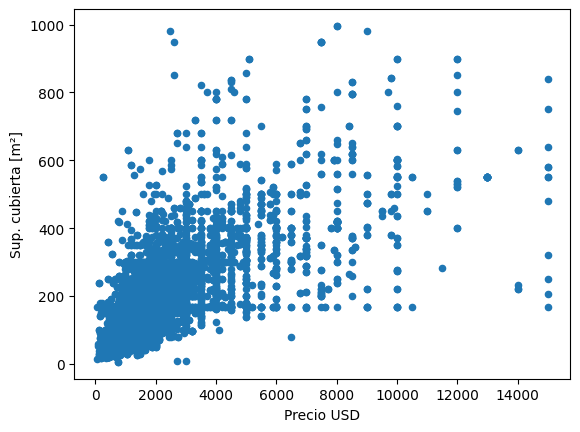

In [5]:
df.plot.scatter(x="Precio USD", y="Sup. cubierta [m²]")

In [6]:
matriz = df.corr() # -1 (existe una relación fuerte)  0   1 (existe relación fuerte)
print (matriz)

                    Precio ARS  Precio USD  Sup. cubierta [m²]  Dormitorios  \
Precio ARS            1.000000    1.000000            0.392924     0.390096   
Precio USD            1.000000    1.000000            0.725305     0.555574   
Sup. cubierta [m²]    0.392924    0.725305            1.000000     0.707539   
Dormitorios           0.390096    0.555574            0.707539     1.000000   
Baños                 0.509489    0.658396            0.737975     0.739436   
Ambientes             0.368056    0.499371            0.656609     0.746257   
Antiguedad [años]     0.117618   -0.059286           -0.005058     0.081463   

                       Baños  Ambientes  Antiguedad [años]  
Precio ARS          0.509489   0.368056           0.117618  
Precio USD          0.658396   0.499371          -0.059286  
Sup. cubierta [m²]  0.737975   0.656609          -0.005058  
Dormitorios         0.739436   0.746257           0.081463  
Baños               1.000000   0.652860          -0.044917  
A

<ipython-input-6-5630a443f89b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz = df.corr() # -1 (existe una relación fuerte)  0   1 (existe relación fuerte)


In [ ]:
a

# Pipeline,
La funcion pipeline permite juntar varios transformaciones secuenciales que se requieren al ejecutar un conjunto de datos.

**Pipeline(steps=[("titulotransformacion1", transformacion1), ('titulo transformacion2', transformacion2), ....])**

In [7]:
#modulos importantes

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [8]:
df = df.loc[:,('Precio USD', 'Sup. cubierta [m²]',
       'Dormitorios', 'Baños', 'Ambientes', 'Antiguedad [años]')]

In [9]:
#Crear lista de variables numericas y categoricas
# Numericas: 'Precio USD', 'Sup. cubierta [m²]', 'Dormitorios', 'Baños', 'Ambientes', 'Antiguedad[años]'
listanumericas = [ 'Precio USD', 'Sup. cubierta [m²]',
       'Dormitorios', 'Baños', 'Ambientes', 'Antiguedad [años]']

In [10]:
#Crear el pipeline de preprocesamiento para datos numericos y categoricos. (vamos a reescalarlos)
numeric_transformer = Pipeline ( steps=  [  ('scaler', StandardScaler() ) ] )


#ColumnTransformer

es una clase de Scikit-learn que permite aplicar transformaciones de preparacion de datos de forma selectiva, Por ejemplo permite aplicar na transformacion especifica o secuencia de transformaciones solo a las columnas numericas, y una secuencia separada de transformaciones solo a las columnas categoricas.
para usar ColumnTransformer, debe especificar una lista de transformadores.
Cada transformador es una tupla de tres elementos que define el nombre del transformador, la transformacion a aplicar y los indices de columna a los que aplicar por ejemplo (Nombre, Objeto, columnas)

In [11]:
#definir los transformadores
transformer = ColumnTransformer ( [
    ('num', numeric_transformer, listanumericas)
])


#Preparando las muestras de entrenamiento y prueba
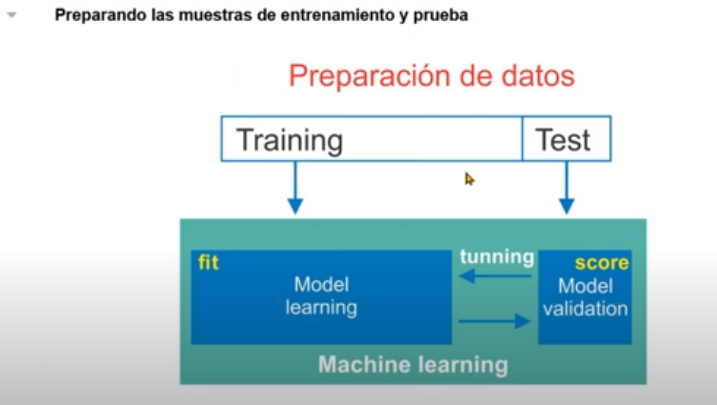

Division general de los datos


+ **X**: Datos sin la columna "Precio USD"
+ **y**: Datos con la columna "Precio USD"

Muestras de entrenamiento y prueba

+ **X_train**: este sera el grupo de entrenamiento

+ **X_test**: este sera el grupo de prueba
+ **y_train**: este sera el target para el grupo de entrenamiento.
+ **y_test**: este sera el target para el grupo de prueba.

In [20]:
#Crear X (quitar la columna o campo de "Precio USD")
X = df

In [21]:
#Crear y (valor de la columna "Precio USD")
y = df['Precio USD']

In [22]:
# Dividir los datos para entrenamiento y prueba (80% van a ser para entrenamiento y el resto para prueba)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [23]:
#Revise el tamaño de cada muestra

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6042, 6), (1511, 6), (6042,), (1511,))

#Validacion cruzada / Cross validation

Para estimar que tan bueno es este modelo y poder compararlo con otro utilizamos validacion cruzada.

CV = es una tecnica utilizada para probar la efectividad de los modelos de machine learning, tambien es un procedimiento de remuestreo utilizado para evaluar un modeo si tenemos datos limitados.

Una manera de obetener las muestras es a traves del metodo del k-fold, el cual divide a los datos en k muestras como e muestra en la imagen:

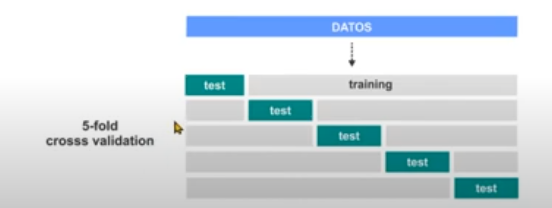

In [32]:
#Definimos na funcion que nos devuelva el score, mean y standard deviation.

def display_scores(scores):
  print('Scores:',scores)
  print('Mean:',scores.mean())
  print('Standard Deviation:',scores.std())

# SELECCIONAMOS ALGUNOS MODELOS Y REALIZAMOS ENTRENAMIENTO

In [40]:
#modelo randomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [41]:
#NOMBRAR UNA VARIABLE PARA NUESTRO MODELO

forest_reg=RandomForestRegressor(n_estimators=10, random_state=42)

In [42]:
#definir el pipeline: transformacion + modelo
model_forest_reg = Pipeline (steps= [
    ('transformer',transformer),
    ('forest_reg',forest_reg)
])

In [43]:
# Ajustar modelo
model_forest_reg.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Precio USD',
                                                   'Sup. cubierta [m²]',
                                                   'Dormitorios', 'Baños',
                                                   'Ambientes',
                                                   'Antiguedad [años]'])])),
                ('forest_reg',
                 RandomForestRegressor(n_estimators=10, random_state=42))])

In [44]:
#calcular score con la validacion cruzada..
from sklearn.model_selection import cross_val_score
forest_reg_scores=cross_val_score(model_forest_reg, X,y,
                                  scoring='neg_mean_squared_error',cv=10)

In [45]:
forest_rmse_score= np.sqrt(-forest_reg_scores)

In [46]:
display_scores(forest_rmse_score)

Scores: [23.68104526 10.59001351  7.55188928  7.83888676  4.08977565  5.41068969
 11.1228391   9.43594649 12.90978581  2.19611035]
Mean: 9.482698190945856
Standard Deviation: 5.678430702367014


Hemos realizado los siguientes pasos:

+ Hemos cargado el conjunto de datos de entrenamiento df_v3.csv.
+ Hemos creado una matriz de correlación para identificar las variables que están más correlacionadas con el precio.
+ Hemos seleccionado las variables a utilizar para el modelo.
+ Hemos creado un pipeline de preprocesamiento para escalar las variables numéricas.
+ Hemos dividido el conjunto de datos en conjuntos de entrenamiento y prueba.
+ Hemos creado un modelo de random forest.
+ Hemos ajustado el modelo al conjunto de entrenamiento.

Ahora estamos listos para evaluar el rendimiento del modelo. Se realizara utilizando el conjunto de datos de prueba

Para evaluar el rendimiento del modelo, podemos usar las siguientes métricas:

Error cuadrático medio (MSE): El MSE es una medida de la diferencia entre los valores predichos y los valores reales. Cuanto menor sea el MSE, mejor será el modelo.
Raíz del error cuadrático medio (RMSE): El RMSE es la raíz cuadrada del MSE. Es una medida más interpretable que el MSE.
R cuadrado (R^2): El R^2 es una medida de la proporción de la varianza de la variable de respuesta que se explica por el modelo. Cuanto mayor sea el R^2, mejor será el modelo.

In [47]:

import sklearn.metrics
# Predecir los valores del conjunto de prueba
y_pred = model_forest_reg.predict(X_test)

# Calcular el MSE y el R^2
mse = np.mean((y_pred - y_test)**2)
r2 = sklearn.metrics.r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)

MSE: 44.009688947716775
R^2: 0.9999877146542309


Los resultados de la validación cruzada muestran que el modelo de random forest tiene un rendimiento muy bueno, con un puntaje RMSE promedio de 9.48 y una desviación estándar de 5.68. Esto significa que el modelo puede predecir el precio de las propiedades con un error promedio de 9.48 USD.

El R^2 de 0.999987 indica que el modelo explica casi el 100% de la varianza del precio de las propiedades. Esto es un resultado excelente, lo que indica que el modelo es muy adecuado para predecir el precio de las propiedades.